# 立法會投票數據統計

立法會會期快將結束，在新一屆立法會選舉開始前，讓我們利用 python 的 <a href='https://pandas.pydata.org/docs/index.html'>pandas</a> 模組統計一下這一屆（第六屆立法會 2016-2020）立法會的投票紀錄。所有紀錄都可以在<a href='https://www.legco.gov.hk/general/chinese/open-legco/open-data.html'>立法會公開數據庫</a>找到原始數據（xml）。

統計分為三部份：
1. [立法會整體數據分析](#overall)
2. [議員個人投票統計](#member-wise)
3. [拫據黨派分析投票傾向](#party-wise)

導入 pandas（主要統計模組）, matplotlib（製作圖表用） 及 numpy（計算時有可能會用到）：

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set(font='SimHei', font_scale=1)

IPython 的指令，把圖表直接顯示在 notebook Output 裡

In [2]:
%matplotlib inline

把事先整合好的數據導入：

In [3]:
legco_cm = pd.read_csv('./cm/legco_cm_summary2.csv')
legco_cm.head()

,vote-id,vote-date,vote-time,motion,mover,mover-type,result,梁君彥,涂謹申,梁耀忠,...,overall-vote,overall-yes,overall-no,overall-abstain,梁國雄,羅冠聰,姚松炎,劉小麗,梁頌恆,游蕙禎
0,20190515001,16/05/2019,10:34:10,《2019年撥款條例草案》 - 全體委員會審議 - 總目21的修正案 (修正案編號1),胡志偉,Member,Negatived,Present,Absent,Yes,...,50,22,28,0,NaN,NaN,NaN,NaN,NaN,NaN
1,20190515002,16/05/2019,10:39:52,縮短點名表決響鐘時間的議案,李慧琼,Member,Passed,Present,Absent,No,...,50,28,22,0,NaN,NaN,NaN,NaN,NaN,NaN
2,20190515003,16/05/2019,10:41:42,《2019年撥款條例草案》 - 全體委員會審議 - 總目22的修正案 (修正案編號2),鄺俊宇,Member,Negatived,Present,Absent,Yes,...,48,22,24,2,NaN,NaN,NaN,NaN,NaN,NaN
3,20190515004,16/05/2019,10:43:19,《2019年撥款條例草案》 - 全體委員會審議 - 總目33的修正案 (修正案編號3),朱凱廸,Member,Negatived,Present,Absent,Yes,...,52,16,30,6,NaN,NaN,NaN,NaN,NaN,NaN
4,20190515005,16/05/2019,10:44:54,《2019年撥款條例草案》 - 全體委員會審議 - 總目42的修正案 (修正案編號4),陳志全,Member,Negatived,Present,Absent,Yes,...,52,10,30,12,NaN,NaN,NaN,NaN,NaN,NaN


大概看一下數據，有 ID，日期，時間，動議，動議人，動議種類，結果，地區出席（出席沒投票），地區投票，地區贊成票，地區反對票，地區棄權票，功能組別出席（出席沒投票），投票，贊成票，反對票，棄權票，全體立法會出席（出席沒投票），投票，贊成票，反對票，棄權票，然後就是各個議員在各個動議的投票狀態。

In [4]:
legco_cm.dtypes

vote-id      object
vote-date    object
vote-time    object
motion       object
mover        object
              ...  
羅冠聰          object
姚松炎          object
劉小麗          object
梁頌恆          object
游蕙禎          object
Length: 97, dtype: object

In [5]:
legco_cm.columns

Index(['vote-id', 'vote-date', 'vote-time', 'motion', 'mover', 'mover-type',
       'result', '梁君彥', '涂謹申', '梁耀忠', '石禮謙', '張宇人', '李國麟', '林健鋒', '黃定光', '李慧琼',
       '陳克勤', '陳健波', '梁美芬', '黃國健', '葉劉淑儀', '謝偉俊', '毛孟靜', '田北辰', '何俊賢', '易志明',
       '胡志偉', '姚思榮', '馬逢國', '莫乃光', '陳志全', '陳恒鑌', '梁志祥', '梁繼昌', '麥美娟', '郭家麒',
       '郭偉强', '郭榮鏗', '張華峰', '張超雄', '黃碧雲', '葉建源', '葛珮帆', '廖長江', '潘兆平', '蔣麗芸',
       '盧偉國', '鍾國斌', '楊岳橋', '尹兆堅', '朱凱廸', '吳永嘉', '何君堯', '何啟明', '林卓廷', '周浩鼎',
       '邵家輝', '邵家臻', '柯創盛', '容海恩', '陳沛然', '陳振英', '陳淑莊', '張國鈞', '許智峯', '陸頌雄',
       '劉國勳', '劉業強', '鄭松泰', '鄺俊宇', '譚文豪', '范國威', '區諾軒', '鄭泳舜', '謝偉銓', '陳凱欣',
       'geo-present', 'geo-vote', 'geo-yes', 'geo-no', 'geo-abstain',
       'func-present', 'func-vote', 'func-yes', 'func-no', 'func-abstain',
       'overall-present', 'overall-vote', 'overall-yes', 'overall-no',
       'overall-abstain', '梁國雄', '羅冠聰', '姚松炎', '劉小麗', '梁頌恆', '游蕙禎'],
      dtype='object')

# 1. 整體投票統計<a id='overall'></a>

## - 參與投票人數統計

平均一次投票參與人數：

In [6]:
legco_cm['overall-present'].mean()

52.61971830985915

平均投票人數：（主席不投票）

In [7]:
legco_cm['overall-vote'].mean()

52.19934994582882

## - 動議通過率

紀錄動議總數: 923
獲通過的動議: 271
總通過率: 29.4%


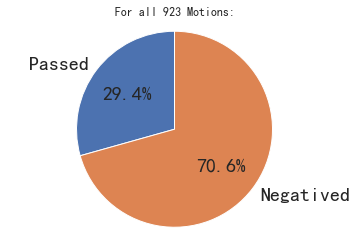

In [8]:
passed = (legco_cm['result'] == 'Passed').sum()
print(f'紀錄動議總數: {legco_cm.shape[0]}')
print(f'獲通過的動議: {passed}')
print(f'總通過率: {passed / legco_cm.shape[0] * 100:.1f}%')

labels = ['Passed', 'Negatived']
size = [passed, legco_cm.shape[0] - passed]
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})
ax1.axis('equal')
ax1.set_title('For all 923 Motions:')
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

紀錄中把動議分為立法會成員及公務員兩種。

In [9]:
legco_cm['mover-type'].unique()

array(['Member', 'Public Officer'], dtype=object)

由議員提出的議案：789，獲得通過：138，通過率：0.175
由政府提出的議案：134，獲得通過：133，通過率：0.993


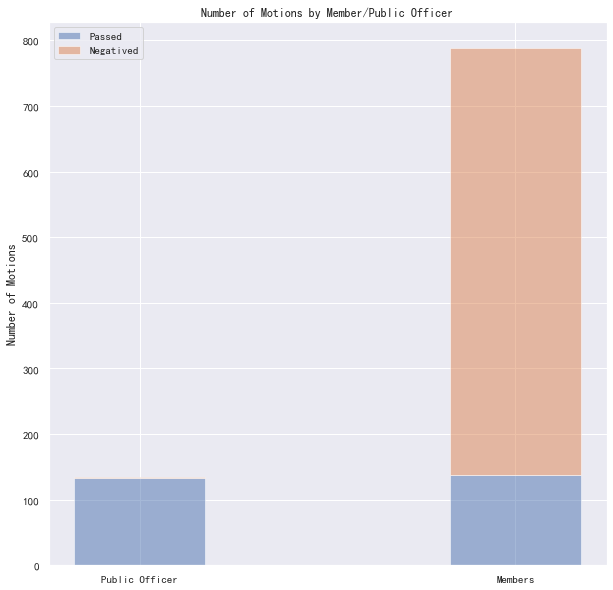

Alternative: Pie charts


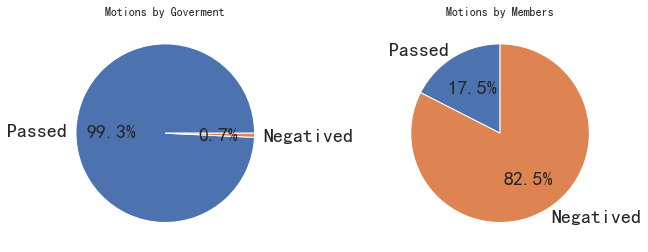

In [10]:
member_motion = legco_cm[(legco_cm['mover-type']=='Member')].result.count()
member_motion_passed = legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].result.count()
gov_motion = legco_cm[(legco_cm['mover-type']=='Public Officer')].result.count()
gov_motion_passed = legco_cm[(legco_cm['mover-type']=='Public Officer') & (legco_cm['result']=='Passed')].result.count()

print(f"由議員提出的議案：{member_motion}，獲得通過：{member_motion_passed}，通過率：{member_motion_passed / member_motion:.3f}")
print(f"由政府提出的議案：{gov_motion}，獲得通過：{gov_motion_passed}，通過率：{gov_motion_passed / gov_motion:.3f}")

# Bar Chart:
negatived = [(gov_motion - gov_motion_passed), (member_motion - member_motion_passed)]
passed = [gov_motion_passed, member_motion_passed]
p1 = plt.bar([0, 1], passed, 0.35, alpha=0.5)
p2 = plt.bar([0, 1], negatived, 0.35, bottom=passed, alpha=0.5)
plt.ylabel('Number of Motions')
plt.title('Number of Motions by Member/Public Officer')
plt.xticks([0, 1], ('Public Officer', 'Members'))
plt.legend((p1[0], p2[0]), ('Passed', 'Negatived'))
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

print("Alternative: Pie charts")
labels = ['Passed', 'Negatived']
member_size = [member_motion_passed, member_motion - member_motion_passed]
gov_size = [gov_motion_passed, gov_motion - gov_motion_passed]
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
ax[1].pie(member_size, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 20})
ax[1].set_title('Motions by Members')

ax[0].pie(gov_size, labels=labels, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 20})
ax[0].set_title('Motions by Goverment')

plt.show()

### 唯一被立法會否決由政府提出的議案

投票結果：

In [11]:
oops = legco_cm[(legco_cm['mover-type']=='Public Officer') & (legco_cm['result']=='Negatived')]
oops[['motion', 'mover', 'overall-vote', 'overall-yes', 'overall-no']]

,motion,mover,overall-vote,overall-yes,overall-no
263,《2017年應課稅品(修訂)條例草案》 - 全體委員會審議 - 食物及衞生局局長的第二組修正...,食物及衞生局局長,41,12,29


有關動議及發言：
https://www.info.gov.hk/gia/general/201802/07/P2018020700996.htm

## - 動議投票時間分怖

In [12]:
legco_cm['vote-date'] = pd.to_datetime(legco_cm['vote-date'])
legco_cm['vote-time'] = pd.to_datetime(legco_cm['vote-time']).dt.time
legco_cm[['vote-id', 'vote-date', 'vote-time', 'mover-type', 'result']].head()

,vote-id,vote-date,vote-time,mover-type,result
0,20190515001,2019-05-16,10:34:10,Member,Negatived
1,20190515002,2019-05-16,10:39:52,Member,Passed
2,20190515003,2019-05-16,10:41:42,Member,Negatived
3,20190515004,2019-05-16,10:43:19,Member,Negatived
4,20190515005,2019-05-16,10:44:54,Member,Negatived


首先看一下政府動議按月份分怖

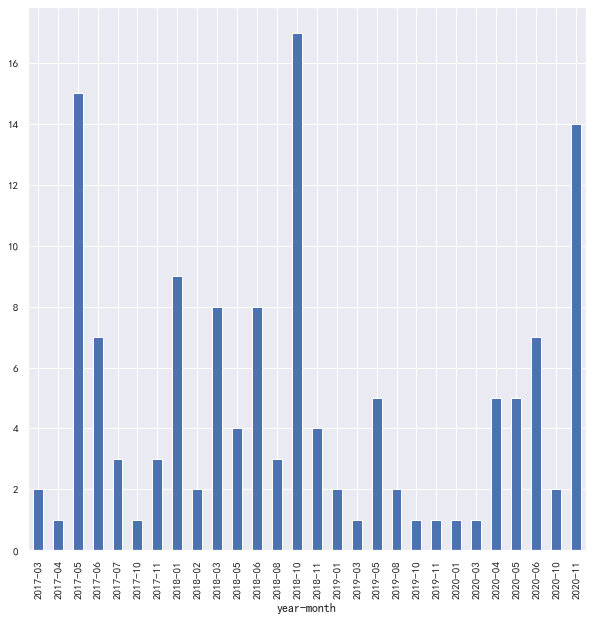

In [13]:
legco_cm['year-month'] = legco_cm['vote-date'].dt.to_period('M')
legco_cm[legco_cm['mover-type'] == 'Public Officer'].groupby('year-month').size().plot(kind='bar')

整合起來再看一次...

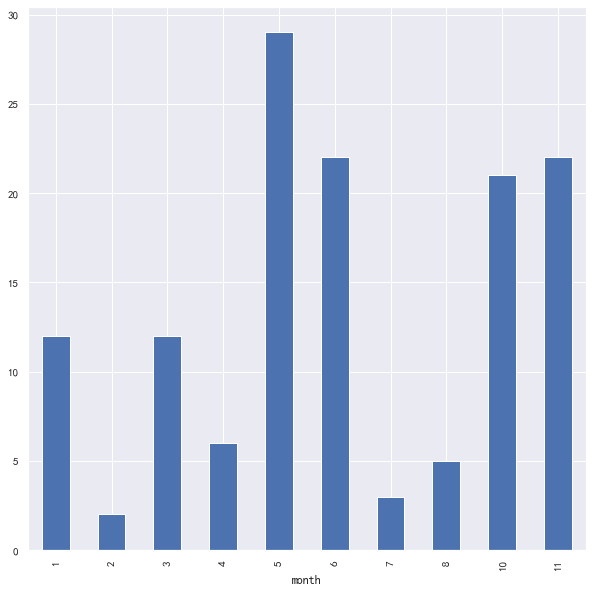

In [14]:
legco_cm['month'] = legco_cm['vote-date'].dt.month
legco_cm[legco_cm['mover-type'] == 'Public Officer'].groupby('month').size().plot(kind='bar')

看來大部份政府議案都在5、6、10、11月提出。

### 然後看一下政府主要是在週幾動議投票

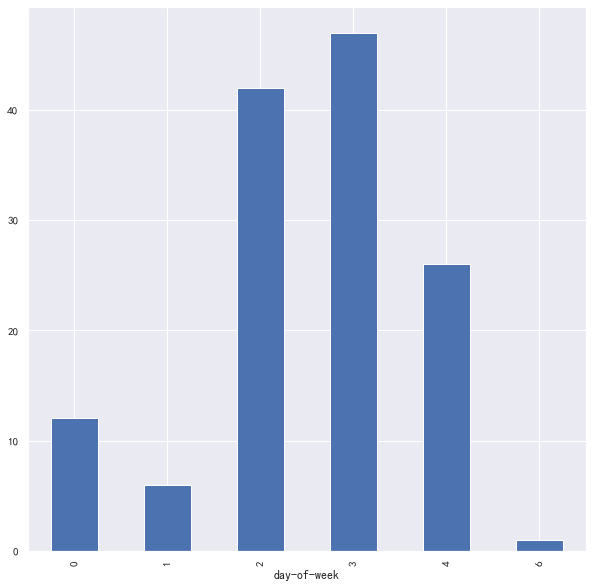

In [15]:
legco_cm['day-of-week'] = legco_cm['vote-date'].dt.dayofweek
legco_cm[legco_cm['mover-type'] == 'Public Officer'].groupby('day-of-week').size().plot(kind='bar')

主要是週三、週四，其次是週五。

### 再來看一下投票時間分怖

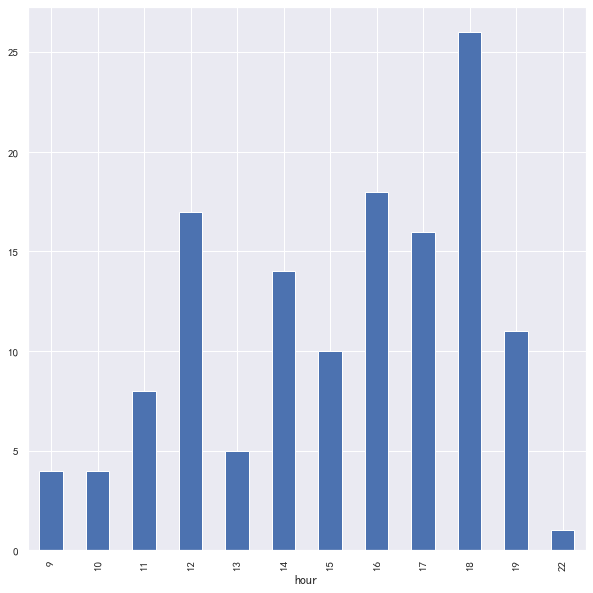

In [16]:
legco_cm['hour'] = pd.to_datetime(legco_cm['vote-time'].astype('str')).dt.hour
legco_cm[legco_cm['mover-type'] == 'Public Officer'].groupby('hour').size().plot(kind='bar')

看來午飯 （12 時）及晚飯/下班前（18 時）的動議數字比較高....

# 2. 議員動議及投票數據統計<a id="member-wise"></a>

梁頌恆及游蕙禎沒有參與過立法會會議就被取消資格。

In [17]:
members = ['梁君彥', '涂謹申', '梁耀忠', '石禮謙', '張宇人', '李國麟', '林健鋒', '黃定光', '李慧琼',
           '陳克勤', '陳健波', '梁美芬', '黃國健', '葉劉淑儀', '謝偉俊', '毛孟靜', '田北辰', '何俊賢',
           '易志明', '胡志偉', '姚思榮', '馬逢國', '莫乃光', '陳志全', '陳恒鑌', '梁志祥', '梁繼昌', 
           '麥美娟', '郭家麒', '郭偉强', '郭榮鏗', '張華峰', '張超雄', '黃碧雲', '葉建源', '葛珮帆', 
           '廖長江', '潘兆平', '蔣麗芸', '盧偉國', '鍾國斌', '楊岳橋', '尹兆堅', '朱凱廸', '吳永嘉', 
           '何君堯', '何啟明', '林卓廷', '周浩鼎', '邵家輝', '邵家臻', '柯創盛', '容海恩', '陳沛然', 
           '陳振英', '陳淑莊', '張國鈞', '許智峯', '陸頌雄', '劉國勳', '劉業強', '鄭松泰', '鄺俊宇', 
           '譚文豪', '范國威', '區諾軒', '鄭泳舜', '謝偉銓', '陳凱欣', '梁國雄', '羅冠聰', '姚松炎', 
           '劉小麗']
# '梁頌恆', '游蕙禎'

## - 議員的動議數量統計
### 曾經動議的議員：

In [18]:
print(legco_cm[(legco_cm['mover-type']=='Member')].mover.unique())
print(len(legco_cm[(legco_cm['mover-type']=='Member')].mover.unique()), '人')

['胡志偉' '李慧琼' '鄺俊宇' '朱凱廸' '陳志全' '區諾軒' '范國威' '林卓廷' '譚文豪' '郭家麒' '楊岳橋' '鄭松泰'
 '毛孟靜' '葉建源' '許智峯' '尹兆堅' '李國麟' '梁美芬' '梁志祥' '郭偉强' '吳永嘉' '蔣麗芸' '張超雄' '劉小麗'
 '田北辰' '黃國健' '葉劉淑儀' '張國鈞' '陳恒鑌' '陳克勤' '梁繼昌' '涂謹申' '葛珮帆' '邵家輝' '易志明' '謝偉俊'
 '陳淑莊' '郭榮鏗' '梁耀忠' '邵家臻' '盧偉國' '謝偉銓' '麥美娟' '柯創盛' '何君堯' '莫乃光' '潘兆平' '周浩鼎'
 '黃碧雲' '廖長江' '何啟明' '陸頌雄' '容海恩' '陳凱欣' '陳沛然' '姚松炎' '林健鋒' '劉國勳' '張華峰' '羅冠聰'
 '梁國雄' '張宇人' '姚思榮' '陳健波' '黃定光' '鄭泳舜' '馬逢國' '何俊賢']
68 人


把動議數、通過 / 否決數作成一個圖表

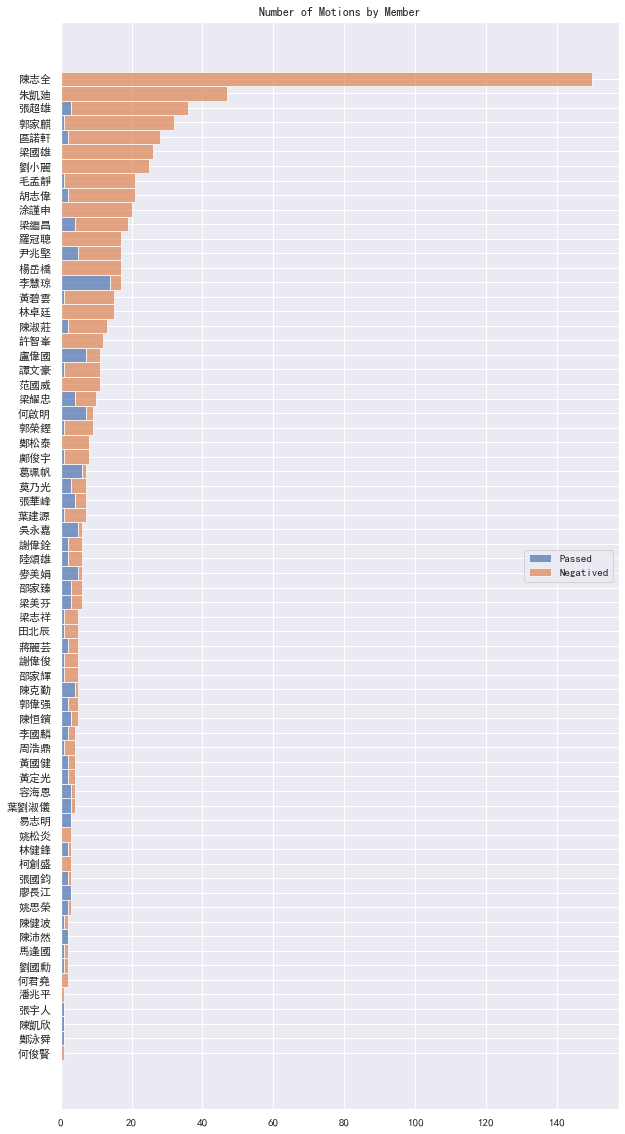

In [44]:
move_count = legco_cm[(legco_cm['mover-type']=='Member')].groupby('mover').size().reset_index(name='counts').sort_values('counts')
move_pass = legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].groupby('mover').size().reset_index(name='passed')
move_neg = legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Negatived')].groupby('mover').size().reset_index(name='negatived')
move_count = pd.merge(move_count, move_pass, on='mover', how='outer')
move_count = pd.merge(move_count, move_neg, on='mover', how='outer')
move_count[['passed', 'negatived']] = move_count[['passed', 'negatived']].fillna(0).astype('int')

plt.rcParams['figure.figsize'] = (10, 20)

inp = np.arange(move_count.shape[0])
p1 = plt.barh(inp, move_count['passed'], 1, alpha=0.7)
p2 = plt.barh(inp, move_count['negatived'], 1, left=move_count['passed'], alpha=0.7)
plt.title('Number of Motions by Member')
plt.yticks(inp, move_count['mover'])
plt.legend((p1[0], p2[0]), ('Passed', 'Negatived'), loc='center right')
plt.show()


作圖的話 73 名議員太長不太好看...

## - 議員投票率統計

In [20]:
df = pd.DataFrame([legco_cm.groupby(member).size() for member in members])
df.fillna(0).astype('int')
df['member'] = members
df['vote_num'] = df.fillna(0)['Yes'] + df.fillna(0)['No'] + df.fillna(0)['Abstain']
df['vote_rate'] = df['vote_num'] / (df['vote_num'] + df.fillna(0)['Present'] + df.fillna(0)['Absent']) * 100
df.sort_values('vote_rate').head(10).fillna(0)

,Absent,Present,Abstain,No,Yes,member,vote_num,vote_rate
0,24.0,899.0,0.0,0.0,0.0,梁君彥,0.0,0.000000
71,189.0,0.0,7.0,49.0,62.0,姚松炎,118.0,38.436482
30,472.0,1.0,22.0,112.0,316.0,郭榮鏗,450.0,48.754063
3,449.0,3.0,8.0,333.0,130.0,石禮謙,471.0,51.029252
1,420.0,19.0,46.0,95.0,343.0,涂謹申,484.0,52.437703
60,413.0,0.0,11.0,375.0,124.0,劉業強,510.0,55.254605
16,399.0,0.0,37.0,309.0,178.0,田北辰,524.0,56.771398
14,380.0,2.0,18.0,329.0,194.0,謝偉俊,541.0,58.613218
40,378.0,0.0,27.0,341.0,177.0,鍾國斌,545.0,59.046587
5,377.0,1.0,50.0,118.0,377.0,李國麟,545.0,59.046587


## - 把投票統計和動議統計結合就成為議員的一個簡單成積表

In [21]:
member_summary = pd.merge(move_count, df[['Absent', 'Present', 'vote_num', 'vote_rate', 'member']], 
                          right_on='member', 
                          left_on='mover', 
                          how='outer')
member_summary = member_summary.drop(columns=['mover']).fillna(0)
member_summary.head(10)

,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member
0,1.0,0.0,1.0,115.0,0.0,808.0,87.540628,何俊賢
1,1.0,1.0,0.0,42.0,0.0,494.0,92.164179,鄭泳舜
2,1.0,1.0,0.0,4.0,0.0,313.0,98.738170,陳凱欣
3,1.0,1.0,0.0,217.0,1.0,705.0,76.381365,張宇人
4,1.0,0.0,1.0,50.0,2.0,871.0,94.366197,潘兆平
5,2.0,0.0,2.0,212.0,0.0,711.0,77.031419,何君堯
6,2.0,1.0,1.0,130.0,1.0,792.0,85.807151,劉國勳
7,2.0,1.0,1.0,328.0,0.0,595.0,64.463705,馬逢國
8,2.0,2.0,0.0,339.0,0.0,584.0,63.271939,陳沛然
9,2.0,1.0,1.0,64.0,1.0,858.0,92.957746,陳健波


## - 個別議員的表現分析

### 動議完全沒有獲通過的議員

In [22]:
loser = []
for name in legco_cm[(legco_cm['mover-type']=='Member')].mover.unique():
    if name not in legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].mover.unique():
        loser.append(name)

print('Loser name list: ', loser)
print(len(loser), '人')

Loser name list:  ['朱凱廸', '陳志全', '范國威', '林卓廷', '楊岳橋', '鄭松泰', '許智峯', '劉小麗', '涂謹申', '柯創盛', '何君堯', '潘兆平', '姚松炎', '羅冠聰', '梁國雄', '何俊賢']
16 人


In [23]:
member_summary[member_summary['member'].isin(loser)]

,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member
0,1.0,0.0,1.0,115.0,0.0,808.0,87.540628,何俊賢
4,1.0,0.0,1.0,50.0,2.0,871.0,94.366197,潘兆平
5,2.0,0.0,2.0,212.0,0.0,711.0,77.031419,何君堯
13,3.0,0.0,3.0,56.0,0.0,867.0,93.932828,柯創盛
15,3.0,0.0,3.0,189.0,0.0,118.0,38.436482,姚松炎
42,8.0,0.0,8.0,88.0,0.0,835.0,90.465872,鄭松泰
46,11.0,0.0,11.0,52.0,0.0,364.0,87.500000,范國威
49,12.0,0.0,12.0,349.0,7.0,567.0,61.430119,許智峯
51,15.0,0.0,15.0,220.0,6.0,697.0,75.514626,林卓廷
54,17.0,0.0,17.0,249.0,7.0,667.0,72.264355,楊岳橋


### 最少有一個動議獲通過的議員

In [24]:
print(legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].mover.unique())
print(len(legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].mover.unique()), '人')

['李慧琼' '李國麟' '梁美芬' '郭偉强' '黃國健' '葉劉淑儀' '張國鈞' '陳恒鑌' '陳克勤' '葛珮帆' '鄺俊宇' '胡志偉'
 '邵家輝' '易志明' '張超雄' '梁志祥' '梁耀忠' '郭家麒' '區諾軒' '邵家臻' '莫乃光' '周浩鼎' '謝偉俊' '廖長江'
 '盧偉國' '何啟明' '陸頌雄' '麥美娟' '葉建源' '梁繼昌' '容海恩' '陳凱欣' '謝偉銓' '陳沛然' '黃碧雲' '尹兆堅'
 '張宇人' '鄭泳舜' '陳淑莊' '劉國勳' '陳健波' '黃定光' '張華峰' '毛孟靜' '譚文豪' '田北辰' '姚思榮' '蔣麗芸'
 '吳永嘉' '林健鋒' '馬逢國' '郭榮鏗']
52 人


In [25]:
member_summary[~member_summary['member'].isin(loser)]

,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member
1,1.0,1.0,0.0,42.0,0.0,494.0,92.164179,鄭泳舜
2,1.0,1.0,0.0,4.0,0.0,313.0,98.738170,陳凱欣
3,1.0,1.0,0.0,217.0,1.0,705.0,76.381365,張宇人
6,2.0,1.0,1.0,130.0,1.0,792.0,85.807151,劉國勳
7,2.0,1.0,1.0,328.0,0.0,595.0,64.463705,馬逢國
8,2.0,2.0,0.0,339.0,0.0,584.0,63.271939,陳沛然
9,2.0,1.0,1.0,64.0,1.0,858.0,92.957746,陳健波
10,3.0,2.0,1.0,61.0,0.0,862.0,93.391116,姚思榮
11,3.0,3.0,0.0,182.0,1.0,740.0,80.173348,廖長江
12,3.0,2.0,1.0,72.0,0.0,851.0,92.199350,張國鈞


### 完全沒有動議的議員

In [26]:
member_summary[member_summary['counts'] == 0].sort_values(['Absent'], ascending=False)

,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member
69,0.0,0.0,0.0,449.0,3.0,471.0,51.029252,石禮謙
72,0.0,0.0,0.0,413.0,0.0,510.0,55.254605,劉業強
70,0.0,0.0,0.0,378.0,0.0,545.0,59.046587,鍾國斌
68,0.0,0.0,0.0,24.0,899.0,0.0,0.000000,梁君彥
71,0.0,0.0,0.0,23.0,3.0,897.0,97.183099,陳振英


能看得出 劉業強、鍾國斌、石禮謙、不但完全沒動議，連投票率也不到 60%

### 投票率最高的 10 名議員：

In [27]:
member_summary.sort_values('vote_num', ascending=False).head(10)

,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member
48,11.0,7.0,4.0,11.0,0.0,912.0,98.808234,盧偉國
71,0.0,0.0,0.0,23.0,3.0,897.0,97.183099,陳振英
40,7.0,6.0,1.0,36.0,0.0,887.0,96.099675,葛珮帆
4,1.0,0.0,1.0,50.0,2.0,871.0,94.366197,潘兆平
13,3.0,0.0,3.0,56.0,0.0,867.0,93.932828,柯創盛
25,5.0,4.0,1.0,61.0,0.0,862.0,93.391116,陳克勤
10,3.0,2.0,1.0,61.0,0.0,862.0,93.391116,姚思榮
19,4.0,2.0,2.0,60.0,1.0,862.0,93.391116,黃定光
21,4.0,1.0,3.0,61.0,0.0,862.0,93.391116,周浩鼎
26,5.0,1.0,4.0,61.0,0.0,862.0,93.391116,邵家輝


### 投票率最低的 10 名議員：

In [28]:
member_summary.sort_values('vote_rate', ascending=True).head(10)

,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member
68,0.0,0.0,0.0,24.0,899.0,0.0,0.000000,梁君彥
15,3.0,0.0,3.0,189.0,0.0,118.0,38.436482,姚松炎
43,9.0,1.0,8.0,472.0,1.0,450.0,48.754063,郭榮鏗
69,0.0,0.0,0.0,449.0,3.0,471.0,51.029252,石禮謙
58,20.0,0.0,20.0,420.0,19.0,484.0,52.437703,涂謹申
72,0.0,0.0,0.0,413.0,0.0,510.0,55.254605,劉業強
29,5.0,1.0,4.0,399.0,0.0,524.0,56.771398,田北辰
27,5.0,1.0,4.0,380.0,2.0,541.0,58.613218,謝偉俊
70,0.0,0.0,0.0,378.0,0.0,545.0,59.046587,鍾國斌
22,4.0,2.0,2.0,377.0,1.0,545.0,59.046587,李國麟


# 3. 根據政黨的投票分析<a id='party-wise'></a>

從 Wikipedia 上找到各個議員的所屬政黨

In [29]:
from bs4 import BeautifulSoup

In [30]:
with open('./party.html', 'r') as f:
    party = f.read()
party_soup = BeautifulSoup(party, 'html.parser')
tr = party_soup.find_all('tr')
tr_text = []
for i in tr:
    j = i.text.strip().split('\n\n')
    a = j[0].split('\n')[-1]
    b = j[-1].split('\n')[0]
    tr_text.append([a, b])
tr_text.remove(['備註', '席位'])
tr_text.remove(['懸空', ''])
for _ in range(3):
    tr_text.remove(['懸空', '懸空'])
party_pd = pd.DataFrame(tr_text)
# correct error due to format
party_pd.loc[party_pd[0] == '吳永嘉', 1] = '經民聯'
party_pd.loc[party_pd[0] == '邵家輝', 1] = '自由黨'
# add missing members
missing = pd.DataFrame([{0: '張華峰', 1: '經民聯'},
 {0: '何啟明', 1: '工聯會'},
 {0: '范國威', 1: '香港本土'},
 {0: '區諾軒', 1: '獨立民主派'},
 {0: '梁國雄', 1: '社民連'}, 
 {0: '羅冠聰', 1: '眾志'},
 {0: '姚松炎', 1: '專業議政'},
 {0: '劉小麗', 1: '工黨'}, 
#  {0: '梁頌恆', 1: '青年新政'},
#  {0: '游蕙禎', 1: '青年新政'}
])
party_pd = party_pd.append(missing, ignore_index=True)
party_pd.replace('公民黨/專業議政', '公民黨', inplace=True)
party_pd.replace('教協/專業議政', '專業議政', inplace=True)
party_pd.replace('民建聯/新界社團聯會', '民建聯', inplace=True)
party_pd.replace('新民黨/公民力量', '新民黨', inplace=True)
party_pd.replace('公專聯/專業議政', '公專聯', inplace=True)
party_pd.replace('經民聯/西九新動力', '經民聯', inplace=True)

In [31]:
party_pd[1].unique()

array(['新民黨', '工聯會', '民主黨', '民建聯', '公民黨', '經民聯', '香港本土', '獨立建制派', '獨立民主派',
       '實政圓桌', '熱血公民', '工黨', '人民力量', '自由黨', '專業議政', '公專聯', '獨立中間派', '勞聯',
       '新論壇', '街工', '社民連', '眾志'], dtype=object)

In [32]:
party_pd.head()

,0,1
0,葉劉淑儀,新民黨
1,郭偉强,工聯會
2,許智峯,民主黨
3,張國鈞,民建聯
4,陳淑莊,公民黨


## - 以政黨作單位的投票率

In [33]:
member_summary_party = pd.merge(member_summary, party_pd, left_on='member', right_on=0, how='left')
member_summary_party.drop(columns=0, inplace=True)
member_summary_party

,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member,1
0,1.0,0.0,1.0,115.0,0.0,808.0,87.540628,何俊賢,民建聯
1,1.0,1.0,0.0,42.0,0.0,494.0,92.164179,鄭泳舜,民建聯
2,1.0,1.0,0.0,4.0,0.0,313.0,98.738170,陳凱欣,獨立建制派
3,1.0,1.0,0.0,217.0,1.0,705.0,76.381365,張宇人,自由黨
4,1.0,0.0,1.0,50.0,2.0,871.0,94.366197,潘兆平,勞聯
...,...,...,...,...,...,...,...,...,...
68,0.0,0.0,0.0,24.0,899.0,0.0,0.000000,梁君彥,經民聯
69,0.0,0.0,0.0,449.0,3.0,471.0,51.029252,石禮謙,經民聯
70,0.0,0.0,0.0,378.0,0.0,545.0,59.046587,鍾國斌,自由黨
71,0.0,0.0,0.0,23.0,3.0,897.0,97.183099,陳振英,獨立建制派


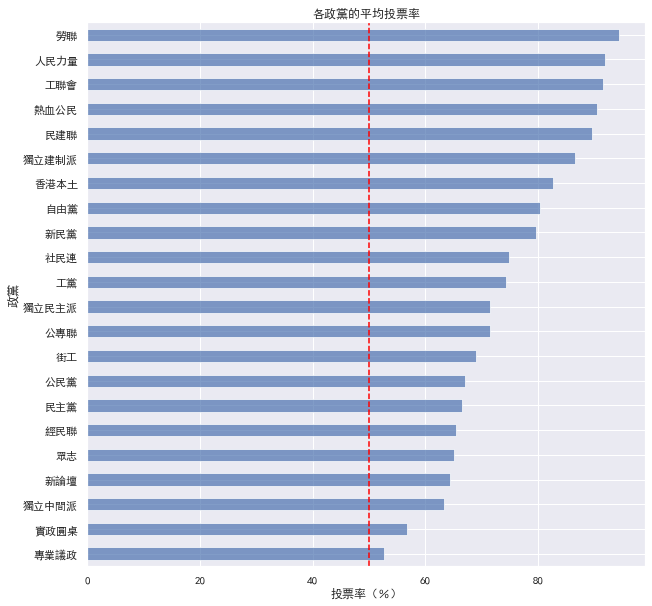

In [34]:
pty_vote_rate = member_summary_party.groupby(1).vote_rate.mean().sort_values()

plt.rcParams['figure.figsize'] = (10, 10)

ax = pty_vote_rate.plot(kind='barh', alpha=0.7, title='各政黨的平均投票率')
ax.set_xlabel('投票率（％）')
ax.set_ylabel("政黨")
ax.axvline(x=50, color='red', ls='--', alpha=1, label='50%')

# - 各政黨投票的統一性分析
為分析各政黨議員投票的統一性，我們先定義一個統一性的分數。

$$Score = \frac{A (Yes - No)^2 + B (Yes - Abstain)^2 + C (No - Abstain)^2}{(Yes + No + Abstain)^2} $$

Score = 1 為同一次投票內選擇完全一致（不包括缺席），越分散分數越低。

就每一次的投票結果而言 Yes 和 No 及 Abstain 是對立的，但 No 和 Abstain 雖然立場有不同但做成結果一致，所以把 Yes-No 和 Yes-Abstain 的比重 (A, B) 設成 2，而 No-Abstain (C) 則設成 0.5。把 function 寫成可以改變比重的模式方便日後（反悔時）調整。

In [35]:
legco_member_vote = legco_cm[members]

def diff_vote(inputList, weight=[2, 2, 0.5]):
    yes = 0
    no = 0
    abstain = 0
    for vote in inputList:
        if vote == 'Yes':
            yes += 1
        elif vote == 'No':
            no += 1
        elif vote == 'Abstain':
            abstain += 1
    if (yes**2 + no**2 + abstain**2) > 0:
        diff = 1 - (weight[0] * (yes * no) + weight[2] * (no * abstain) + weight[1] * (yes * abstain)) / (yes + no + abstain)**2
    else:
        diff = np.nan
    return diff

測試：

In [36]:
party_member_list = list(party_pd.groupby(1).get_group('民建聯')[0])
test = []
for i in range(legco_member_vote.shape[0]):
    diff = diff_vote(legco_member_vote[(member for member in legco_member_vote.columns if member in party_member_list)].loc[i])
    test.append(diff)
legco_cm['民建聯'] = test
print(legco_cm['民建聯'].describe())
legco_cm[legco_cm['民建聯'] < 1][[member for member in legco_cm.columns if member in party_member_list]+['motion']]

count    923.000000
mean       0.998910
std        0.014140
min        0.739645
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: 民建聯, dtype: float64


,黃定光,李慧琼,陳克勤,何俊賢,陳恒鑌,梁志祥,葛珮帆,蔣麗芸,周浩鼎,柯創盛,張國鈞,劉國勳,鄭泳舜,motion
97,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,No,Abstain,Abstain,根據《立法會(權力及特權)條例》動議的議案
125,Abstain,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,縮短點名表決響鐘時間的議案
463,No,No,Yes,No,No,No,No,Absent,Absent,No,No,No,NaN,《2017年撥款條例草案》 - 全體委員會審議階段 - 總目90的修正案 (修正案編號72)
603,No,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Absent,Abstain,Abstain,郭家麒議員對何君堯議員的「活化強制性公積金」議案作出的修正案
730,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Yes,Yes,陸頌雄議員對何啟明議員的「全面檢討勞工法例，改善勞工權益」議案作出的修正案
786,Absent,Absent,Yes,Abstain,Yes,Yes,Yes,Yes,Yes,Yes,Absent,Absent,Yes,修訂《2018年食物攙雜(金屬雜質含量)(修訂)規例》的擬議決議案
828,No,No,No,No,No,No,No,No,No,No,No,No,Yes,《國歌條例草案》 - 全體委員會審議 - 陳志全議員的第十四及十五項修正案 (修正案編號18...


測試2：

In [37]:
party_member_list = list(party_pd.groupby(1).get_group('新民黨')[0])
test = []
for i in range(legco_member_vote.shape[0]):
    diff = diff_vote(legco_member_vote[(member for member in legco_member_vote.columns if member in party_member_list)].loc[i])
    test.append(diff)
legco_cm['新民黨'] = test
print(legco_cm['新民黨'].describe())
legco_cm[legco_cm['新民黨'] < 1][[member for member in legco_cm.columns if member in party_member_list]+['motion']]

count    867.000000
mean       0.999423
std        0.016981
min        0.500000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: 新民黨, dtype: float64


,葉劉淑儀,容海恩,motion
292,No,Yes,尹兆堅議員對謝偉俊議員的「制訂房屋政策 紓緩殷切住屋需求」議案作出的修正案


如果每一個政黨都要把投票不一的議題全部列出太貼位置，把迴圈修改為只列出 motion id。同時亦把只有一名立法會議員的政黨除掉。

In [38]:
party_vote_summary = []

for party in party_pd[1].unique():
    party_member_list = list(party_pd.groupby(1).get_group(party)[0])
    test = []
    diff_list = []
    for i in range(legco_member_vote.shape[0]):
        diff = diff_vote(legco_member_vote[(member for member in legco_member_vote.columns if member in party_member_list)].loc[i])
        test.append(diff)
        if diff < 1:
            diff_list.append(i)
    legco_cm[party] = test
    party_vote = {'party-name': party,
                  'num-members': len([member for member in legco_member_vote.columns if member in party_member_list]),
                  'involed-num-motion': legco_cm[party].count(), 
                  'num-motion-not-unify': len(diff_list),
                  'motion-list': diff_list,
                  'score-mean': legco_cm[party].mean(),
                  'score-sd': legco_cm[party].std()
                 }
    party_vote_summary.append(party_vote)

party_vote_summary_df = pd.DataFrame(party_vote_summary)
party_vote_summary_df[party_vote_summary_df['num-members'] > 1].sort_values('score-mean')
#     print(legco_cm[legco_cm[party] < 1][[member for member in legco_cm.columns if member in party_member_list]+['motion']])

,party-name,num-members,involed-num-motion,num-motion-not-unify,motion-list,score-mean,score-sd
8,獨立民主派,4,864,201,"[8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22,...",0.904245,0.182354
7,獨立建制派,8,918,143,"[2, 63, 71, 72, 73, 75, 76, 77, 78, 86, 87, 88...",0.957347,0.117170
15,公專聯,2,739,46,"[8, 35, 45, 48, 93, 94, 110, 167, 211, 272, 29...",0.975981,0.102756
5,經民聯,8,923,69,"[65, 71, 76, 87, 88, 95, 97, 99, 105, 145, 146...",0.984435,0.068563
6,香港本土,2,751,26,"[601, 609, 610, 611, 612, 628, 638, 639, 719, ...",0.985186,0.082972
14,專業議政,2,639,21,"[65, 66, 72, 155, 287, 288, 289, 291, 295, 296...",0.988850,0.069268
11,工黨,2,727,15,"[65, 66, 72, 81, 283, 292, 294, 389, 555, 588,...",0.993810,0.050441
13,自由黨,4,923,14,"[0, 86, 87, 88, 112, 210, 261, 272, 395, 611, ...",0.996336,0.035309
2,民主黨,7,829,9,"[55, 214, 215, 216, 217, 284, 285, 399, 837]",0.996820,0.033502
4,公民黨,5,877,6,"[79, 270, 720, 797, 800, 810]",0.997817,0.027980


可以看到以獨立民主派分歧最大，新民黨最統一（但只有 2 人），其次是工聯會和民建聯。

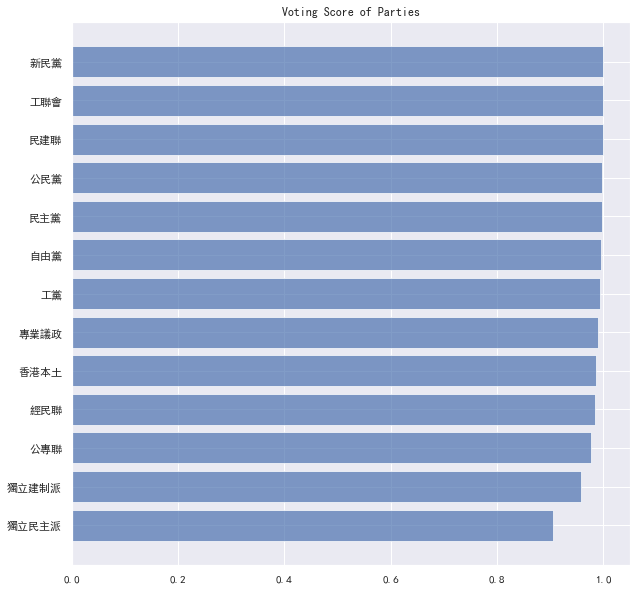

In [39]:
party_vote_summary = party_vote_summary_df[party_vote_summary_df['num-members'] > 1].sort_values('score-mean')
inp = np.arange(party_vote_summary.shape[0])

plt.barh(inp, party_vote_summary['score-mean'], alpha=0.7)
plt.title('Voting Score of Parties')
plt.yticks(inp, party_vote_summary['party-name'])
plt.show()

## - 接下來根據 wikipedia 的定義把政黨分為泛民和建制兩大陣營作分析
分類根據 wikipedia 對建制和泛民的定義

In [40]:
proBJ = ['民建聯', '工聯會', '經民聯', '自由黨', '新民黨', '實政圓桌', '新論壇', '勞聯']
proDem = ['民主黨', '公民黨', '工黨', '街工', '公專聯', '人民力量', '社民連']
all_parties = ['新民黨', '工聯會', '民主黨', '民建聯', '公民黨', '經民聯', '香港本土', '獨立建制派', '獨立民主派',
       '實政圓桌', '熱血公民', '工黨', '人民力量', '自由黨', '專業議政', '公專聯', '獨立中間派', '勞聯',
       '新論壇', '街工', '社民連', '眾志']

In [41]:
def getPartyMember(partyList):
    memberList = []
    for party in partyList:
        memberList += list(party_pd.groupby(1).get_group(party)[0])
    return memberList

In [42]:
side_vote_summary = []
side = [{'name': '建制', 'party-list': proBJ}, 
        {'name': '泛民', 'party-list': proDem},
        {'name': '立法會全體', 'party-list': all_parties}
        ]

for s in side:
    party_member_list = getPartyMember(s['party-list'])
    test = []
    diff_list = []
    for i in range(legco_member_vote.shape[0]):
        diff = diff_vote(legco_member_vote[(member for member in legco_member_vote.columns if member in party_member_list)].loc[i])
        test.append(diff)
        if diff < 1:
            diff_list.append(i)
    legco_cm[s['name']] = test
    party_vote = {'party-name': s['name'],
                  'num-members': len([member for member in legco_member_vote.columns if member in party_member_list]),
                  'involed-num-motion': legco_cm[s['name']].count(), 
                  'num-motion-not-unify': len(diff_list),
                  'motion-list': diff_list,
                  'score-mean': legco_cm[s['name']].mean(),
                  'score-sd': legco_cm[s['name']].std()
                  }
    side_vote_summary.append(party_vote)

In [45]:
side_summary_df = pd.DataFrame(side_vote_summary)
side_summary_df

,party-name,num-members,involed-num-motion,num-motion-not-unify,motion-list,score-mean,score-sd
0,建制,35,923,219,"[0, 60, 61, 62, 63, 64, 65, 71, 72, 73, 74, 75...",0.938258,0.135194
1,泛民,19,922,339,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",0.879992,0.183805
2,立法會全體,73,923,887,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.635670,0.137720


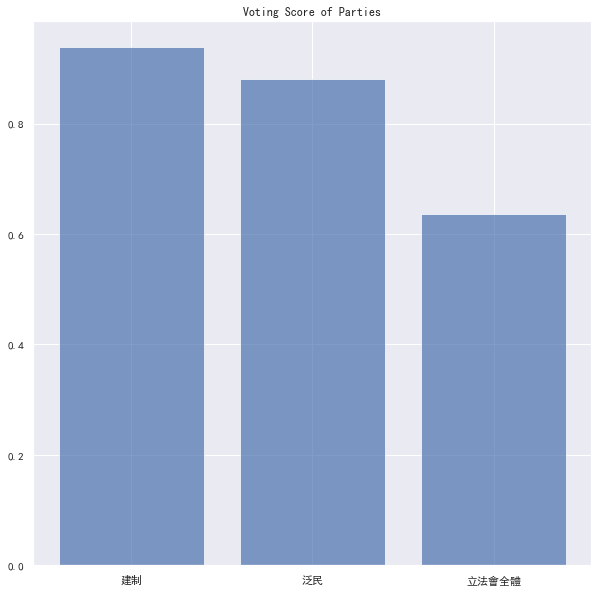

In [43]:
inp = np.arange(side_summary_df.shape[0])
plt.bar(inp, side_summary_df['score-mean'], alpha=0.7)
plt.title('Voting Score of Parties')
plt.xticks(inp, ['建制', '泛民', '立法會全體'])
plt.show()